# Week 5 Assignment
## MBP 1201 - Introductory Biostatistics


## Submission format
This assignment should be submitted online on Quercus by Oct 24, 11:59 pm EDT. Your submission should include a single file:

1. STUDENT_NAME_STUDENT_NUMBER.ipynb containing all of the Python code, plain-text answers, and figures you’ve used to answer the
questions.


In this assignment, we are going to use non-parametric statistics to look at the gene expression of a well-studied oncogene, MYC, in 4 lymph-related cancers: Burkitt lymphoma (BL), follicular lymphoma (FL), diffuse large B-cell lymphoma (DLBCL), and chronic lymphocytic leukemia (CLL).

Start by loading the gene expression data (mRNA abundance) of the oncogene MYC in four types of lymph-related cancers. The data is available in the CSV file called `MYC_expression_lymph.csv`. Sample code is provided to load this in. 

## Exercise 1. Plotting and Qualitative Statistics (5 marks)
Make the following plots to visualize the distribution of the data.

* Histograms of mRNA abundance values in the entire dataset and separately for the subtypes
* Boxplots of all four subtypes
* QQ-plots relative to the theoretical normal distribution with same mean and variance with a trendline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal, norm, probplot, skew, shapiro, wilcoxon
import numpy as np

dataset = pd.read_csv("MYC_expression_lymph.csv", sep=",", header=0, index_col=0)

dataset.head()

,variable,value,subtype,patient,gene
1,DO27857,23.542831,DLBCL,patient_1,MYC
2,DO52666,22.685371,DLBCL,patient_2,MYC
3,DO6585,2.739602,DLBCL,patient_3,MYC
4,DO27765,219.628077,DLBCL,patient_4,MYC
5,DO52655,34.945026,DLBCL,patient_5,MYC


- Part 3 QQ-Plots

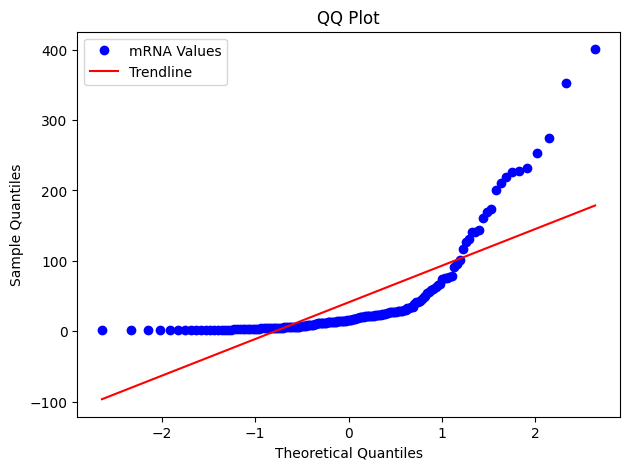

In [2]:
mean = np.mean(dataset.value)
std = np.std(dataset.value, ddof=1)

fig, ax = plt.subplots(figsize=(7,5))
_, _ = probplot(dataset.value, dist="norm", plot=ax)

ax.legend(['mRNA Values', 'Trendline'])
ax.set_title('QQ Plot')
ax.set_xlabel('Theoretical Quantiles')
ax.set_ylabel('Sample Quantiles')
plt.show()


## Exercise 2. Non-Parametric Statistical Calculations (5 marks)
Calculate the two-tailed Wilcoxon ranked sum tests (aka two-tailed Mann-Whitney U tests) for the gene expression values of MYC for the following comparisons. Is there a significant difference between gene expression values?

* DLBCL vs CLL

* BL vs FL

Now, compare the MYC gene expression values across all four subtypes using a single application of a non-parametric statistical test.


- Part 1 DLBCL vs CLL\
According to the p-value of the two-tailed Mann-Whitney U test, it is less than 0.025 (the significance level is 0.05), we now should reject the null hypothesis that DLBCL is same as CLL subtype mRNA values.

In [4]:
# Compare DLBCL and CLL
DLBCL = dataset.value[dataset.subtype == 'DLBCL']
CLL = dataset.value[dataset.subtype == 'CLL']

ret_dlccll = mannwhitneyu(DLBCL, CLL, alternative='two-sided')
print(f'statistic and p-value of two-tailed Mann-Whitney U test between DLBCL and CLL respectively: {ret_dlccll.statistic} and {ret_dlccll.pvalue}')

statistic and p-value of two-tailed Mann-Whitney U test between DLBCL and CLL respectively: 2209.0 and 0.001848150125386994


- Part 1 BL vs FL\
According to the p-value of the two-tailed Mann-Whitney U test, it is larger than 0.025 (the significance level is 0.05), we now should fail to reject the null hypothesis that BL is same as FL subtype mRNA values, which is possible that there is a significant difference between the BL and FL subtype mRNA values.

In [5]:
# Compare DLBCL and CLL
BL = dataset.value[dataset.subtype == 'BL']
FL = dataset.value[dataset.subtype == 'FL']

ret_blfl = mannwhitneyu(BL, FL, alternative='two-sided')
print(f'statistic and p-value of two-tailed Mann-Whitney U test between BL and FL respectively: {ret_blfl.statistic} and {ret_blfl.pvalue}')

statistic and p-value of two-tailed Mann-Whitney U test between BL and FL respectively: 346.0 and 0.4516372815110762


## Exercise 3. Bootstrapping Fold Change Distributions (5 marks)
* Compute the mean Fold Change (FC) of MYC in tumors of CLL vs DLBCL subtypes.
* A function `select_subtype(df, tumor_type)` is given to select 20 values of `df` with a subtype `tumor_type`. Run this function 1000 times for each tumor subtype and store the results. Plot a histogram of the mean values of the function output for the `DLBCL` subtype. 
* Using the output of the above step, create a distribution of FC values for (CLL vs DLBCL) and (BL vs DLBCL) subtypes by treating each of the 20-element selections as its own patient population. Are these FC distributions normal at the level $\alpha=0.05$? 
* Based on your result above, use the appropriate (parametric or non-parametric) test to determine if there is a difference between these FC distributions at the level $\alpha=0.05$. 

In [ ]:
def select_subtype(df, tumor_subtype):
    """
    Function to select 20 values in df with tumor subtype inputted. 
    """
    return np.random.choice(df.loc[df.subtype == tumor_subtype].value.to_numpy(), size=20)

## Exercise 4. Advantages and Disadvantages of Non-Parametric Statistics (5 marks)
What are the advantages of using non-parametric statistical tests? Why aren't non-parametric tests used when the datasets follow a normal distribution?

## Exercise 5. PCA vs ICA (1 mark bonus, optional)

What are the main differences between principal component analysis and independent component analysis? What are the main linear algebra tools used for PCA and ICA, respectively? 